# Simulating a mixture of sparse + dense network from a mixture of GGPs

In [1]:
from operator import itemgetter

import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sgp import GGPrnd, BSgraphrnd, GGPgraphrnd, GGPmixtureGraphrnd
from sgp.GraphUtil import compute_growth_rate, degree_distribution, degree_one_nodes

%matplotlib inline

### Set up hyper-params for the mixture graph

Expected weight from dense-GGP is -d_sigma / d_tau

In [2]:
s_alpha = 20
s_tau = 1
s_sigma = 0.5

d_alpha = 100
d_tau = 1
d_sigma = -0.2

G, D, w, w_rem, params, sparse_nodes, dense_nodes = GGPmixtureGraphrnd(s_alpha, s_sigma, s_tau, d_alpha, d_sigma, d_tau)

### How many sparse & dense nodes in the graph?

In [3]:
n = G.shape[0]
n_s = len(sparse_nodes); n_d = len(dense_nodes)
print('sparse nodes', n_s)
print('dense nodes', n_d)

sparse nodes 531
dense nodes 338


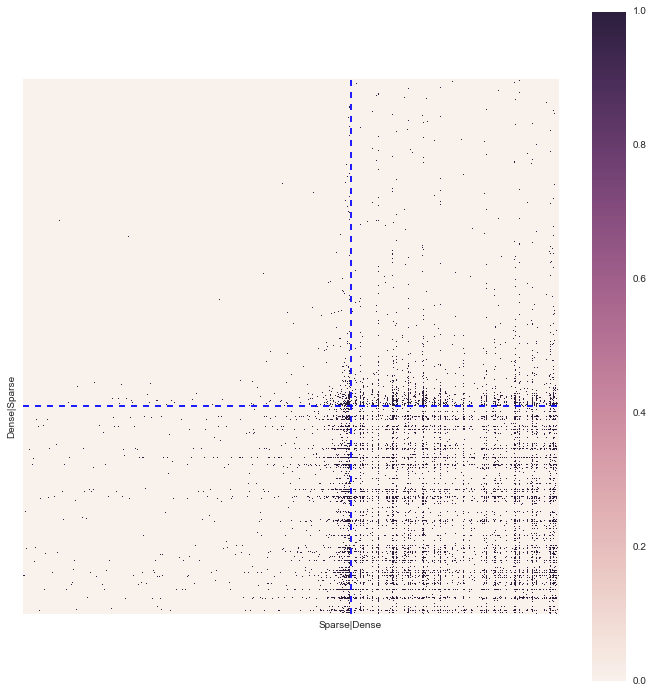

In [4]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(G.toarray(), square=True, xticklabels=False, yticklabels=False)
ax.set_xticks([n_s])
ax.set_xticklabels(['Sparse|Dense'])
ax.set_yticks([n_d])
ax.set_yticklabels(['Dense|Sparse'], rotation='vertical')
ax.hlines(n_d, xmin=0, xmax=n, linestyles='dashed', color='blue')
ax.vlines(n_s, ymin=0, ymax=n, linestyles='dashed', color='blue')

The sparse nodes are sorted by their weights.

## Compute the growth rate of random graph

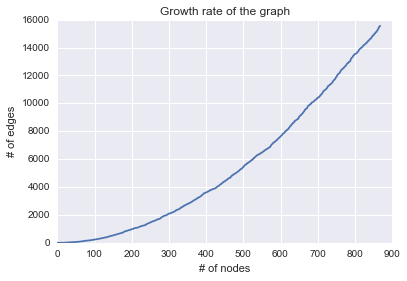

In [5]:
g_rate = compute_growth_rate(G)
plt.plot(g_rate)
plt.title('Growth rate of the graph')
plt.xlabel('# of nodes')
plt.ylabel('# of edges')

## Compute degree distribution of random graph

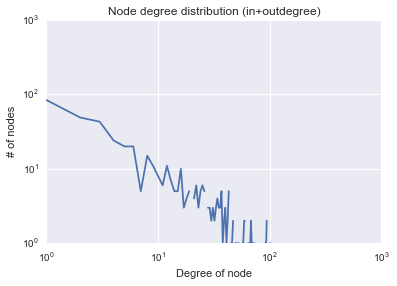

In [6]:
d, d_list = degree_distribution(G)
plt.loglog(d_list[1:])
plt.title('Node degree distribution (in+outdegree)')
plt.xlabel('Degree of node')
plt.ylabel('# of nodes')

In [7]:
print('Number of nodes with degree one', degree_one_nodes(G))

Number of nodes with degree one 86
